[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/ANDREWTOLUTAIWO/poor_people_water_consumption/blob/main/PhD%20Thesis%20MLR%20code.ipynb)

### Training, Validation, Testing and Evaluation Functions

In [4]:
import numpy as np
import pandas as pd
import math

# Training the model
def training(x1, y1):
    print('TRAINING DATA')
    X_train_prediction = model.predict(x1)
    #Evaluating the trained model
    evaluation(y_train, X_train_prediction)
    
#Validating the model
def validation(x1, y1):
    print('VALIDATION DATA')
    X_valid_prediction = model.predict(x1)
    #Evaluating the validated model
    evaluation(y1, X_valid_prediction)

#Testing the model
def testing(x1, y1):
    print('TESTING DATA')
    X_test_prediction = model.predict(x1)
    #Evaluating the tested model
    evaluation(y1, X_test_prediction)
    

# Predicting with the complete data
def complete_prediction(x1, y1):
    print('COMPLETE DATA')
    X_complete_prediction = model.predict(x1)
    evaluation(y, X_complete_prediction)
    #Convert to dataframe
    pred = pd.DataFrame(X_complete_prediction, columns=['Predicted volume'])
    # Join original data table and pred
    complete_data = pd.DataFrame(pd.concat([data_new, pred], axis=1))
    #Get first 100 records
    #data100 = complete_data.iloc[:100]
    #print into excel csv file
    complete_data.to_csv('predicted_without_GSF_ANN.csv')
    
# Model evaluation with Mean Absolute Error, Root Mean Square Error and R Squared Score
def evaluation(x, y):
    mae = np.abs(np.subtract(x, np.asarray(y))).mean()
    print('MAE = ', mae)
    rmse = math.sqrt(np.square(np.subtract(x, y)).mean())
    print('RMSE = ', rmse)
    n = (np.subtract(x, x.mean())*np.subtract(y, y.mean())).sum()
    d = math.sqrt(np.square(np.subtract(x, x.mean())).sum()*np.square(np.subtract(y, y.mean())).sum())
    r2s = np.ceil(np.square(n/d)*100.0)
    print('Rsquared =', r2s, "\n")
    


### Normal Equation Function

In [7]:
def normal_equation(X, y): 
    # A = Coefficient matrix, 
    # y = observation vector, or the target variable,
    # n = number of observations (during training, hould be number of training set), 
   
    from numpy.linalg import inv
    import sys
    np.set_printoptions(precision=None, threshold=sys.maxsize, edgeitems=7)
    # set bias term to 1 for each sample and concatenate with A  
    A = np.c_[np.ones((len(X), 1)), X]  
    #print("Coefficient Matrix, A: ", "\n", A, "\n")
    A_transpose = A.T  
    params = inv(A_transpose.dot(A)).dot(A_transpose).dot(y) 
    print('Here are the parameters; intercept is first in the list: ',"\n", params, "\n")
    # normal equation  # theta = (A.T * X)^(-1) * A.T * y  
    # test prediction  
    A2 = np.c_[np.ones((len(X), 1)), X]  
    prediction = A2.dot(params) 
    #print("Prediction: ", "\n", prediction, "\n")
    #Evaluating the output by calling the function Evaluation
    evaluation(y, prediction)

### Pearson Correlation function

In [11]:
# Pearson Correlation
def pearson_correlation(data):
    import matplotlib.pyplot as plt
    import seaborn as sns
    corr = data.corr()
    #Plotting heatmap
    plt.figure(figsize = (10,6))
    return sns.heatmap(corr, annot=True)

<AxesSubplot:>

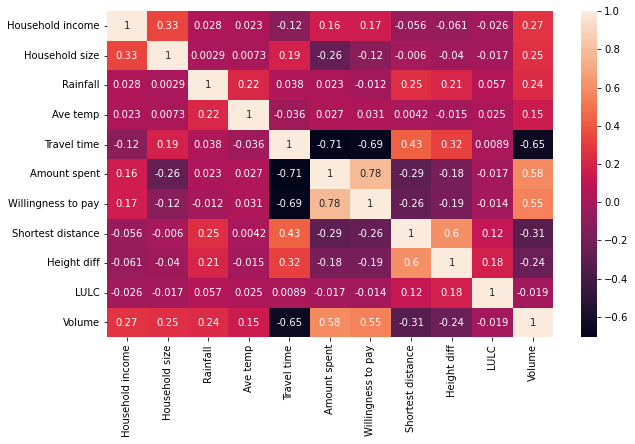

In [13]:
# One-Hot Encoding
data = pd.read_csv("COMPLETE_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])
encoded_data.to_csv('ENCODED DATA.csv')

data_new = pd.DataFrame(encoded_data)

# Loading the data
data_pearson = data_new.drop(columns=['ID', 
            'Education',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Gender_male',
            'Gender_female',
            'Method_delivered',
            'Method_borehole',
            'Method_carried',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

# Testing the feature selection code
pearson_correlation(data_pearson)

### Modelling Multilinear Regression with Selected Featuers

In [16]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

# One-Hot Encoding
data = pd.read_csv("COMPLETE_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)
# Modeling with Selected Features
X = data_new.drop(columns=['ID',
            'Education',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Volume',
            'Gender_male',
            'Gender_female',
            'Method_delivered',
            'Method_borehole',
            'Method_carried',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

y = data_new['Volume']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

# Developing the model with Pipeline that infuses StandardScaler with SDGRegressor
model = Pipeline([('scaler', StandardScaler()), ('sgd', SGDRegressor(max_iter=10000, tol=1e-3))])

# Fitting the model
model.fit(X_train, y_train)


#Testing the MLR code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)
 
 #Calling Normal Equation
print("IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA")
normal_equation(X_train, y_train)
print("IMPLEMENTING NORMAL EQUATION WITH VALIDATING DATA")
normal_equation(X_valid, y_valid)
print("IMPLEMENTING NORMAL EQUATION WITH TESTING DATA")
normal_equation(X_test, y_test)
print("IMPLEMENTING NORMAL EQUATION WITH COMPLETE DATA")
normal_equation(X, y)

TRAINING DATA
MAE =  86.93107477976324
RMSE =  104.71284616910302
Rsquared = 71.0 

VALIDATION DATA
MAE =  91.1782944570674
RMSE =  107.17092862514153
Rsquared = 72.0 

TESTING DATA
MAE =  85.2228200617163
RMSE =  103.31978149018009
Rsquared = 68.0 

COMPLETE DATA
MAE =  87.18497127568907
RMSE =  104.82310165809238
Rsquared = 71.0 

IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA
Here are the parameters; intercept is first in the list:  
 [-3.09122996e+02  1.43439326e-04  7.12021628e+01  4.82760064e-01
  5.79587166e+00 -2.83971181e+00  4.41441193e-01  8.92101481e-03
 -6.26609873e-02 -1.39746711e+00 -1.04929085e+01] 

MAE =  86.60737416304418
RMSE =  104.66497998076308
Rsquared = 71.0 

IMPLEMENTING NORMAL EQUATION WITH VALIDATING DATA
Here are the parameters; intercept is first in the list:  
 [-3.17766252e+02 -1.27231740e-04  7.88183768e+01  6.21170922e-01
  4.66990572e+00 -2.38779075e+00  6.22627472e-01 -7.28368023e-02
 -2.07807440e-01  3.53054646e+00 -7.40871450e+00] 

MAE =  83.861

In [246]:
# from sklearn import preprocessing
# import numpy as np
# #X4 = X.iloc[:3]
# #np.linalg.det(X4)

# X = np.array([[0, 1], [ 2, 3]])
# print(X)

### Modelling Random  Forest with Selected Features

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# One-Hot Encoding
data = pd.read_csv("COMPLETE_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)
# Modeling with Selected Features
X = data_new.drop(columns=['ID',
            'Education',
            'Rainfall',
            'Ave temp',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Volume',
            'Gender_male',
            'Gender_female',
            'Method_delivered',
            'Method_borehole',
            'Method_carried',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

y = data_new['Volume']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

#Modeling with Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)

#Fitting the model
model.fit(X_train, y_train)

# checking the oob score
print('Out of bag score = ', model.oob_score_, '\n')


# Testing the RF code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

#Calling Normal Equation
print("IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA")
normal_equation(X_train, y_train)
print("IMPLEMENTING NORMAL EQUATION WITH VALIDATING DATA")
normal_equation(X_valid, y_valid)
print("IMPLEMENTING NORMAL EQUATION WITH TESTING DATA")
normal_equation(X_test, y_test)
print("IMPLEMENTING NORMAL EQUATION WITH COMPLETE DATA")
normal_equation(X, y)

Out of bag score =  0.6523370835500275 

TRAINING DATA
MAE =  102.18676198434272
RMSE =  106.6163216543467
Rsquared = 70.0 

VALIDATION DATA
MAE =  111.17697270266541
RMSE =  116.10402824059642
Rsquared = 62.0 

TESTING DATA
MAE =  106.14115506471262
RMSE =  111.47162557671125
Rsquared = 68.0 

COMPLETE DATA
MAE =  103.48122236421155
RMSE =  108.09365801342479
Rsquared = 69.0 

IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA
Here are the parameters; intercept is first in the list:  
 [ 1.68580918e+02  1.70989885e-04  7.34464156e+01 -2.91196046e+00
  5.24673624e-01 -7.28939837e-02 -2.45162540e-03  1.62601157e-01
 -8.71123557e+00] 

MAE =  104.90272113378981
RMSE =  116.27138419777945
Rsquared = 64.0 

IMPLEMENTING NORMAL EQUATION WITH VALIDATING DATA
Here are the parameters; intercept is first in the list:  
 [-3.05695086e+01 -6.94557549e-05  7.68091031e+01 -2.59929943e+00
  4.36028770e-01  1.21632409e-01  4.42370874e-02 -1.89197600e-02
  1.22136318e+01] 

MAE =  107.51670481335773
RMSE

## Modelling Support Vector Regression with Selected Features

In [21]:
from sklearn.svm import LinearSVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# One-Hot Encoding
data = pd.read_csv("COMPLETE_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)
# Modeling with Selected Features
X = data_new.drop(columns=['ID',
            'Education',
            'Rainfall',
            'Ave temp',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Volume',
            'Gender_male',
            'Gender_female',
            'Method_delivered',
            'Method_borehole',
            'Method_carried',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

y = data_new['Volume']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)


#Modeling with Support Vector Regressor
#model = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
model = Pipeline([('scaler', StandardScaler()), ('svr', LinearSVR(C=1.0, epsilon=0.2))])

#Fitting the model
model.fit(X_train, y_train)


# Testing the SVR code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

#Calling Normal Equation
print("IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA")
normal_equation(X_train, y_train)
print("IMPLEMENTING NORMAL EQUATION WITH VALIDATING DATA")
normal_equation(X_valid, y_valid)
print("IMPLEMENTING NORMAL EQUATION WITH TESTING DATA")
normal_equation(X_test, y_test)
print("IMPLEMENTING NORMAL EQUATION WITH COMPLETE DATA")
normal_equation(X, y)

TRAINING DATA
MAE =  109.01281366433543
RMSE =  134.1009166359231
Rsquared = 63.0 

VALIDATION DATA
MAE =  110.0347316930933
RMSE =  132.82125003497396
Rsquared = 62.0 

TESTING DATA
MAE =  106.74774000283624
RMSE =  130.29387295533164
Rsquared = 63.0 

COMPLETE DATA
MAE =  108.88849810106112
RMSE =  133.5973145431118
Rsquared = 63.0 

IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA
Here are the parameters; intercept is first in the list:  
 [ 9.87720986e+01  1.67517609e-04  7.43982121e+01 -2.86756523e+00
  5.36907124e-01 -7.68286265e-02 -2.71268612e-03 -1.31454756e-01
  2.33494074e-01] 

MAE =  105.48884344167297
RMSE =  117.15389611502067
Rsquared = 64.0 

IMPLEMENTING NORMAL EQUATION WITH VALIDATING DATA
Here are the parameters; intercept is first in the list:  
 [-4.32812500e+03 -1.13015389e-04  8.26207482e+01 -3.77113416e+00
  4.20511972e-01 -1.58039536e-01  8.41082666e-02  1.42118459e+00
  2.16562500e+02] 

MAE =  2977.0101544385425
RMSE =  2979.060502035352
Rsquared = 65.0 

IMP

## Modelling Multilayer Perceptron ANN with Selected Features

In [23]:
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# One-Hot Encoding
data = pd.read_csv("COMPLETE_data 2.csv")

encoded_data = pd.get_dummies(data, columns = ['Gender', 'Method', 'Availability', 'Quality'])

data_new = pd.DataFrame(encoded_data)
# Modeling with Selected Features
X = data_new.drop(columns=['ID',
            'Education',
            'Rainfall',
            'Ave temp',
            'Kitchen Sink',
            'ToiletWC',
            'Garden',
            'Car',
            'Volume',
            'Gender_male',
            'Gender_female',
            'Method_delivered',
            'Method_borehole',
            'Method_carried',
            'Method_well',
            'Availability_not_often',
            'Availability_often',
            'Quality_poor',
            'Quality_fair',
            'Quality_good',
            'Quality_very good'], axis=1)

y = data_new['Volume']

# Splitting data_var into training-validation-test set in ratio 80-10-10
# We first split the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8)

# Now we divide the remaining data equally between valid and test
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.5)

model = Pipeline([('scaler', StandardScaler()), ('sgd', MLPRegressor(hidden_layer_sizes=(32,),
                   activation="relu", 
                   solver='adam',
                   learning_rate_init=0.01,
                   random_state=1, 
                   warm_start=True,
                   max_iter=2000))])
   
# Fitting the model
model.fit(X_train, y_train)

# Testing the ANN code
training(X_train, y_train)
validation(X_valid, y_valid)
testing(X_test, y_test)
complete_prediction(X, y)

#Calling Normal Equation
print("IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA")
normal_equation(X_train, y_train)
print("IMPLEMENTING NORMAL EQUATION WITH VALIDATING DATA")
normal_equation(X_valid, y_valid)
print("IMPLEMENTING NORMAL EQUATION WITH TESTING DATA")
normal_equation(X_test, y_test)
print("IMPLEMENTING NORMAL EQUATION WITH COMPLETE DATA")
normal_equation(X, y)

TRAINING DATA
MAE =  102.98004283676255
RMSE =  110.29906383738302
Rsquared = 66.0 

VALIDATION DATA
MAE =  108.27000775709523
RMSE =  115.36293122826079
Rsquared = 72.0 

TESTING DATA
MAE =  105.53622101678017
RMSE =  114.18327849826467
Rsquared = 67.0 

COMPLETE DATA
MAE =  103.76465714679738
RMSE =  111.20858548574991
Rsquared = 67.0 

IMPLEMENTING NORMAL EQUATION WITH TRAINING DATA
Here are the parameters; intercept is first in the list:  
 [ 9.99142420e+01  1.51962040e-04  7.23588457e+01 -2.72135627e+00
  5.18572320e-01 -3.69988407e-02 -8.25005349e-04 -1.46900577e-01
 -4.71251857e-01] 

MAE =  104.33461485278859
RMSE =  115.25978740119875
Rsquared = 63.0 

IMPLEMENTING NORMAL EQUATION WITH VALIDATING DATA
Here are the parameters; intercept is first in the list:  
 [ 2.48765625e+03  7.93998455e-05  8.79991558e+01 -3.34353326e+00
  6.29578018e-01 -2.19237905e-01  2.07640738e-03  3.70372692e+00
 -1.30917969e+02] 

MAE =  1507.560673424058
RMSE =  1512.2427897080108
Rsquared = 70.0 

